In [13]:
from libraries.ewt_transform import EWT1D 
from libraries.helpers import findFibrets, getLowFreqComponent
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd 

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objects as go 

In [2]:
data = yf.download("SPY", "2015-01-01", "2020-01-01")

fig = go.Figure(data = [
        go.Candlestick(x = data.index, 
        open = data["Open"], high = data["High"],
        low = data["Low"], close = data["Close"])
    ])

# fig.update_layout(xaxis_rangeslider_visible=False, title_text="SPY Stock data")
fig.update_layout(title_text="SPY Stock data", title_x = 0.5)
fig.show()

[*********************100%***********************]  1 of 1 completed


In [3]:
close = list(data["Close"])
close[:10]


[205.5399932861328,
 205.42999267578125,
 201.72000122070312,
 199.82000732421875,
 202.30999755859375,
 205.89999389648438,
 204.25,
 202.64999389648438,
 202.0800018310547,
 200.86000061035156]

In [38]:
def derivative(window):
    if isinstance(window, np.ndarray):
        window = list(window)

    deriv = [] 
    for idx in range(len(window) - 1):
        deriv.append(window[idx+1] - window[idx])
    return np.asarray(deriv) 

def findInflections(window, deriv):
    inflections = [] 
    infId = []
    for idx in range(len(deriv) - 1):
        if deriv[idx] <= 0 and deriv[idx+1] >= 0:
            inflections.append(window[idx])
            infId.append(idx)
        elif deriv[idx] >= 0 and deriv[idx] <= 0:
            inflections.append(window[idx])
            infId.append(idx) 
        elif deriv[idx] == 0:
            inflections.append(window[idx])
            infId.append(idx)
    return inflections, infId

[202.15447094782309, 202.74949324061518]


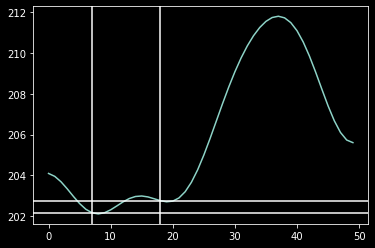

In [39]:
sample = getLowFreqComponent(close[:50], order=1, n=6)
plt.plot(sample)

d_sample = derivative(sample)
inflections, infId = findInflections(sample, d_sample) 
print(inflections)
# plt.plot(d_sample)
for i in inflections:
    plt.axhline(i)
for idx in infId:
    plt.axvline(idx)
plt.show()

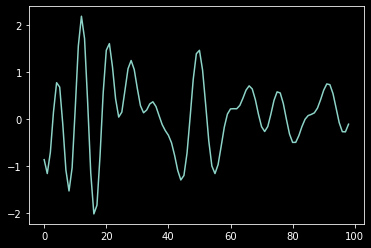

In [17]:
plt.plot(d_sample)